# Exercise 3.8 Trajectories
prepared by M.Hauser

This is a short exercise showing how you can create lines colored according to a third value.

It is similar to an exercise prepared by Nicolas Piaget in the [c2sm python workshop](https://github.com/hvwaldow/pyws-BE-15-2-26).

It uses data calculated with the `lagranto` tool. `lagranto` is part of the Lagrangian Analysis Tool, [Sprenger and Wernli, 2015](https://www.geosci-model-dev.net/8/2569/2015/gmd-8-2569-2015.html).

In [15]:
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import numpy as np
import scipy

import seaborn as sns
import xarray as xr

%matplotlib inline

In [16]:
import mplotutils as mpu

## Load data

Code from the Traj tool in the [Atmospheric Dynamics Group at ETH Zurich](http://www.iac.ethz.ch/groups/wernli).

In [30]:
fN = './../data/lsl_20070119_12_ana_48'

def read_trajectories(fN):

    open_file = open(fN, 'r')
    file_lines = open_file.readlines()
    nvariables = file_lines[2].strip().split()
    head = file_lines[0].split()

    nhead=5

    dtypes = ['f8' for var in nvariables]
    array = np.genfromtxt(fN,
                                 dtype=dtypes,
                                 names=nvariables,
                                 skip_header=nhead,
                                 missing_values=-999.99)

    timestep = float(array[1][0]) - float(array[0][0])
    period = float(array[-1][0]) - float(array[0][0])
    ntime = int(1 + np.around(period / timestep))
    ntra = int(array.size / ntime)

    # reshape traj file
    return np.reshape(array, (ntra, ntime))
    
    
traj = read_trajectories(fN)




`traj` is a [structured array](https://docs.scipy.org/doc/numpy/user/basics.rec.html), a special kind of numpy array (that I never use). It has named fields that can be accessed individually.

In [31]:
print('Shape:', traj.shape)
print('Fields:', traj.dtype.names)

print('Field by name:')
traj['lon']


Shape: (303, 9)
Fields: ('time', 'lon', 'lat', 'p', 'Q', 'RH', 'TH', 'PV', 'P', 'LABEL')
Field by name:


array([[-64.52, -64.1 , -60.97, ..., -45.31, -38.21, -28.01],
       [-60.33, -60.97, -59.49, ..., -44.76, -38.89, -29.02],
       [-64.55, -63.99, -60.39, ..., -46.82, -37.5 , -25.67],
       ...,
       [-66.96, -66.26, -62.71, ..., -70.52, -69.32, -66.9 ],
       [-67.7 , -66.34, -63.62, ..., -57.47, -36.3 , -25.27],
       [-66.78, -65.87, -64.12, ..., -71.2 , -69.68, -66.88]])

### Exercise

 * plot the latitude and longitude of the trajectories
 
> each row in `traj` corresponds to one trajectory

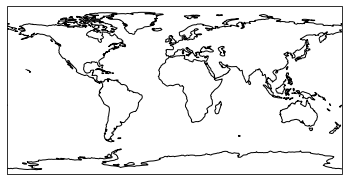

In [32]:
f = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

lon = traj['lon']
lat = traj['lat']

# code here
n_tra = len(lon)
# for i in range(n_tra):
    # plot here



### Solution

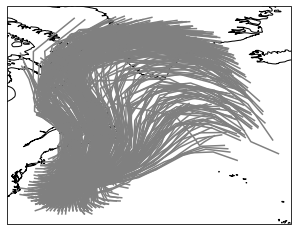

In [33]:
f = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

lon = traj['lon']
lat = traj['lat']

n_tra = len(lon)
for i in range(n_tra):
    ax.plot(lon[i], lat[i], color='0.5', transform=ccrs.PlateCarree())


You can also directly plot all the lines:

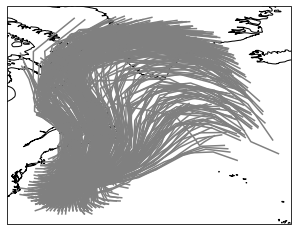

In [34]:
f = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

lon = traj['lon']
lat = traj['lat']

ax.plot(lon.T, lat.T, color='0.5', transform=ccrs.PlateCarree());

## colorline

There is no direct way, to color lines depending on a 3rd value in pyplot. Therefore we start an internet search and find the following [notebook](http://nbviewer.jupyter.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb).

So we copy the code from there

In [35]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.asarray([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


# Interface to LineCollection:

def colorline(x, y, z=None, ax=None, cmap='copper', norm=None, linewidth=3, alpha=1.0, transform=None):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
   
    # parse default arguments

    # colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))
    
    if ax is None:
        ax = plt.gca()
        
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
        
    if norm is None:
        norm = plt.Normalize(0.0, 1.0)

    if transform is None:
        transform = ax.transData
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = [z]
        
    z = np.asarray(z)
    
    segments = make_segments(x, y)
 
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth,
                        alpha=alpha, transform=transform)

    ax.add_collection(lc)
    
    return lc

### Exercise

 * try to get colorline to work
 * you will need to use set_extent
 * add a colorbar
 * bonus: use `mpu` to ensure the colorbar has the right height

In [36]:
print(lon.min(), lon.max())
print(lat.min(), lat.max())

-75.44 -17.98
30.05 74.02


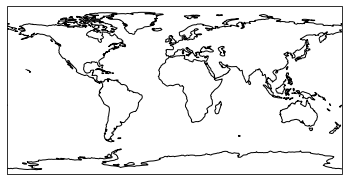

In [37]:
f = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

# code here


### Solution

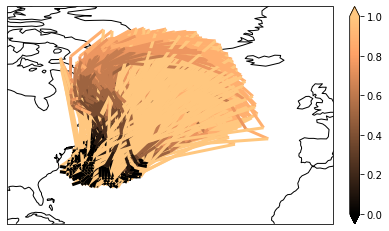

In [38]:
f = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

lc = colorline(lon.T, lat.T, transform=ccrs.PlateCarree())

ax.set_extent([-90, 0, 20, 80], ccrs.PlateCarree())

# create colorbar
cbar = mpu.colorbar(lc, ax, extend='both')

### Exercise

 * color the lines according to the potential temperature (`TH = traj['TH']`)
 * you will have to pass a `norm` to `colorline`
   * what do you have to choose for `norm=plt.Normalize(min, max)`?
 * use the colormap named `'Reds`'
 
Note
> you will have to loop through lat, lon and TH 

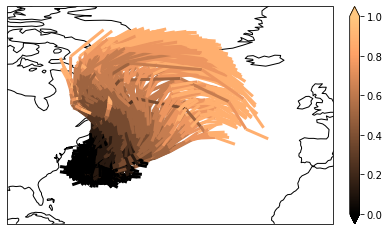

In [39]:
f = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

TH = traj['TH']

# norm = plt.Normalize(...)

n_tra = len(lon)
for i in range(n_tra):
    # adjust colorline
    lc = colorline(lon[i], lat[i])  

ax.set_extent([-90, 0, 20, 80], ccrs.PlateCarree())

# create colorbar
cbar = mpu.colorbar(lc, ax, extend='both')

### Solution

Le't also add ticks and ticklabels. As this is a PlateCarree map, we can use the ordinary mechanism.

In [40]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

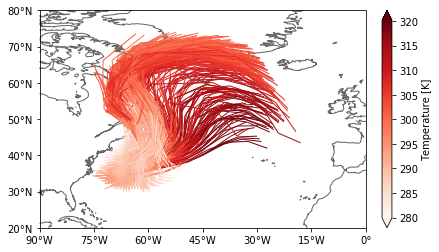

In [41]:
f = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines(resolution='50m', color='0.4')

TH = traj['TH']

norm = plt.Normalize(TH.min(), TH.max())

n_tra = len(lon)
for i in range(n_tra):
    lc = colorline(lon[i], lat[i], TH[i], norm=norm , linewidth=1, cmap='Reds')


ax.set_extent([-90, 0, 20, 80], ccrs.PlateCarree())

# create colorbar in this axes
cbar = mpu.colorbar(lc, ax, extend='both')
cbar.set_label('Temperature [K]')


# set ticks
tick_lon = np.arange(-90, 1, 15)
tick_lat = np.arange(20, 81, 10)

# set the ticks
ax.set_xticks(tick_lon, crs=ccrs.PlateCarree());
ax.set_yticks(tick_lat, crs=ccrs.PlateCarree());

# format the ticks as e.g 60°W
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

#plt.savefig('ex3_8_trajectories.png', dpi=300)